In [2]:
import sys
sys.path.append('/Users/blandt/Documents/PhDWork/Code/polaritymodel')
from Model import *
import copy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib notebook

In [3]:
koff = 0.001
theta = 1
epsilon = 0.75

BaseM = Model(Da=0.1, Dp=0.1, kAP=0.001, kPA=0.001, konA=0.1, konP=0.1, koffA=koff, k=0.01, e_wd=0.1, psi=0.1, 
              eAnt=1, pA=1, pP=1, xsteps=100, deltax=0.5, Tmax=10000, beta=0)


def calc_k_e(dos_base, kon_base, koff_base, psi_base, frac):
    m_base = (kon_base * dos_base) / (koff_base + kon_base * psi_base)
    e_wd = frac / (m_base * (frac - 1) ** 2)
    k = koff_base * np.sqrt(2 * e_wd * m_base + np.sqrt(4 * e_wd * m_base + 1) + 1)
    return k, e_wd


def mon(t, e_wd):
    return (-1 + np.sqrt((1 + 4 * t * e_wd))) * (1 / e_wd) / 2


def dim(t, e_wd):
    return t - (-1 + np.sqrt((1 + 4 * t * e_wd))) * (1 / e_wd) / 2

k, e_wd = calc_k_e(dos_base=1, kon_base=0.1, koff_base=koff, psi_base=0.1, frac=epsilon)
BaseM.k = k
BaseM.e_wd = e_wd

fig_times = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
fig_times = [0, 2000, 4000, 6000, 8000, 10000]
alphas = np.linspace(0.1, 1, len(fig_times))

In [4]:
def create_fig(solns, times, fig_times, alphas, ymax=20):
    fig, ax = plt.subplots()
    x = np.linspace(0, 50, 100)
    for t, a in zip(fig_times, alphas):
        tpoint = np.argmin(abs(times - t))
        for soln, c in zip(solns, ['tab:red', 'dodgerblue']):
            ax.plot(x, soln[tpoint], c=c, alpha=a)
    ax.set_xlabel('Position (µm)')
    ax.set_ylabel('Concentration')
    ax.set_ylim(top=ymax)
    ax.tick_params(axis='both', labelsize=8)        
    fig.set_size_inches(2.5, 2.5)
    fig.tight_layout()
    return fig

### Simulate - triggered

In [4]:
def sim_triggered(beta):
    
    # Set up model
    m = copy.deepcopy(BaseM)
    m.beta = beta
    _m_base = (m.konP * 1) / (koff + m.konP * m.psi)
    m.kPA = 1 / (mon(_m_base, e_wd) + (1 - beta) * dim(_m_base, e_wd))
    m.kAP = 1 / _m_base
    
    # Initiate
    m.initiate()
    
    # Run
    soln, time, solns, times = m.run(t_eval=np.arange(0, m.Tmax + 0.0001, 1))
    return solns, times

In [5]:
# solns_triggered_low_beta, times_triggered_low_beta = sim_triggered(0.3)
# solns_triggered_high_beta, times_triggered_high_beta = sim_triggered(0.8)

In [6]:
# fig = create_fig(solns_triggered_low_beta, times_triggered_low_beta, fig_times=fig_times, alphas=alphas)
# fig.savefig('Figs/triggered_low_beta.png', dpi=600, transparent=True)

In [7]:
# fig = create_fig(solns_triggered_high_beta, times_triggered_high_beta, fig_times=fig_times, alphas=alphas)
# fig.savefig('Figs/triggered_high_beta.png', dpi=600, transparent=True)

### Simulate - spontaneous

In [8]:
def sim_spontaneous(beta):
    
    # Set up model
    m = copy.deepcopy(BaseM)
    m.beta = beta
    _m_base = (m.konP * 1) / (koff + m.konP * m.psi)
    m.kPA = 1 / (mon(_m_base, e_wd) + (1 - beta) * dim(_m_base, e_wd))
    m.kAP = 1 / _m_base
    
    # Initiate
    m.initiate2()
    
    # Run
    soln, time, solns, times = m.run(t_eval=np.arange(0, m.Tmax + 0.0001, 1), kill_uni=False)
    return solns, times

In [9]:
# solns_spontaneous_low_beta, times_spontaneous_low_beta = sim_spontaneous(0.3)
# solns_spontaneous_high_beta, times_spontaneous_high_beta = sim_spontaneous(0.8)

In [10]:
# fig = create_fig(solns_spontaneous_low_beta, times_spontaneous_low_beta, fig_times=fig_times, alphas=alphas)
# fig.savefig('Figs/spontaneous_low_beta.png', dpi=600, transparent=True)

In [11]:
# fig = create_fig(solns_spontaneous_high_beta, times_spontaneous_high_beta, fig_times=fig_times, alphas=alphas)
# fig.savefig('Figs/spontaneous_high_beta.png', dpi=600, transparent=True)

### Colourbars

In [12]:
# colours = {0: 'tab:red', 1: 'tab:red'}
# cmap = mpl.colors.ListedColormap(list(colours.values()), N=100)
# my_cmap = cmap(np.arange(cmap.N))
# alphas = np.linspace(0.1, 1, cmap.N)
# BG = np.asarray([1., 1., 1.,])
# for i in range(cmap.N):
#     my_cmap[i,:-1] = my_cmap[i,:-1] * alphas[i] + BG * (1.-alphas[i])
# my_cmap = ListedColormap(my_cmap)

# fig, ax = plt.subplots(figsize=(1, 2))
# fig.subplots_adjust(right=0.4, left=0.25)
# cbar = matplotlib.colorbar.ColorbarBase(ax, cmap=my_cmap, ticks=np.linspace(0, 1, len(fig_times)))
# cbar.ax.set_yticklabels([None] * len(fig_times))
# cbar.ax.set_title('A', fontsize=10)
# fig.savefig('Figs/simulations_a_cbar.png', dpi=600, transparent=True)

In [13]:
# colours = {0: 'dodgerblue', 1: 'dodgerblue'}
# cmap = mpl.colors.ListedColormap(list(colours.values()), N=100)
# my_cmap = cmap(np.arange(cmap.N))
# alphas = np.linspace(0.1, 1, cmap.N)
# BG = np.asarray([1., 1., 1.,])
# for i in range(cmap.N):
#     my_cmap[i,:-1] = my_cmap[i,:-1] * alphas[i] + BG * (1.-alphas[i])
# my_cmap = ListedColormap(my_cmap)

# fig, ax = plt.subplots(figsize=(1, 2))
# fig.subplots_adjust(right=0.4, left=0.25)
# cbar = matplotlib.colorbar.ColorbarBase(ax, cmap=my_cmap, ticks=np.linspace(0, 1, len(fig_times)))
# cbar.ax.set_yticklabels(fig_times)
# cbar.ax.tick_params(labelsize=6)
# ax.set_ylabel('Time (s)', labelpad=5, fontsize=8)
# cbar.ax.set_title('P', fontsize=10)
# fig.savefig('Figs/simulations_p_cbar.png', dpi=600, transparent=True)

### ASI

In [5]:
def sim(epsilon, beta):
    
    # Set up model
    m = copy.deepcopy(BaseM)
    m.k, m.e_wd = calc_k_e(dos_base=1, kon_base=0.1, koff_base=koff, psi_base=0.1, frac=epsilon)
    
    m.beta = beta
    _m_base = (m.konP * 1) / (koff + m.konP * m.psi)
    m.kPA = 1 / (mon(_m_base, m.e_wd) + (1 - beta) * dim(_m_base, m.e_wd))
    m.kAP = 1 / _m_base
    m.Tmax = 10000
    
    # Initiate
    m.initiate()
    
    # Run
    soln, time, solns, times = m.run(t_eval=np.arange(0, m.Tmax + 0.0001, 1))
    return soln, time

<IPython.core.display.Javascript object>


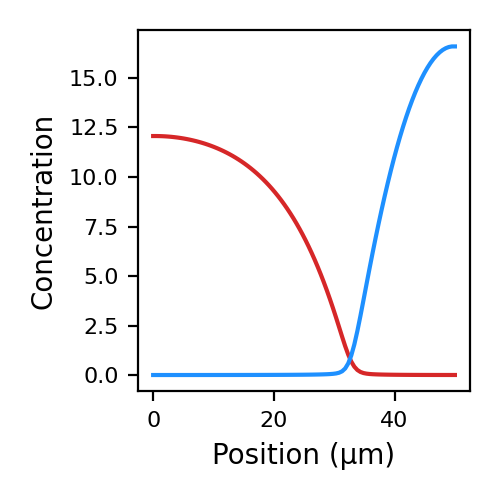

In [27]:
soln, time = sim(0.75, 0.75)

fig, ax = plt.subplots()
x = np.linspace(0, 50, 100)
for s, c in zip(soln, ['tab:red', 'dodgerblue']):
    ax.plot(x, s, c=c)
ax.set_xlabel('Position (µm)')
ax.set_ylabel('Concentration')
# ax.set_ylim(top=ymax)
ax.tick_params(axis='both', labelsize=8)        
fig.set_size_inches(2.5, 2.5)
fig.tight_layout()
# fig.savefig('Figs/pattern.png', dpi=600, transparent=True)

In [9]:
solns = []
betas = [0.75, 0.5, 0.25]
for b in betas:
    print(b)
    soln, _ = sim(0.75, b)
    solns.append(soln)

0.75
0.5
0.25


<IPython.core.display.Javascript object>


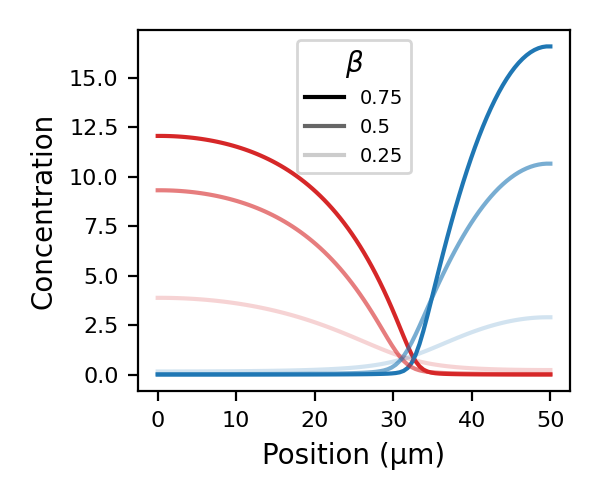

In [17]:
fig, ax = plt.subplots()
x = np.linspace(0, 50, 100)
for s, a, b in zip(solns, [1, 0.6, 0.2], betas):
    ax.plot(x, s[0], alpha=a, c='tab:red')
    ax.plot(x, s[1], alpha=a, c='tab:blue')
    ax.plot(0, 0, c='k', alpha=a, label=b)

ax.legend(fontsize=7, title=r'$\beta$')
ax.set_xlabel('Position (µm)')
ax.set_ylabel('Concentration')
ax.tick_params(axis='both', labelsize=8)
fig.set_size_inches(3, 2.5)
fig.tight_layout()
fig.savefig('Figs/pattern.png', dpi=600, transparent=True)